<a href="https://colab.research.google.com/github/Venkatakousik/FML/blob/main/Univariate_Regression_on_50_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/50_Startups.csv")

In [10]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: >

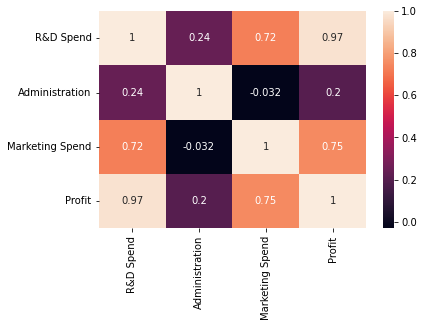

In [11]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

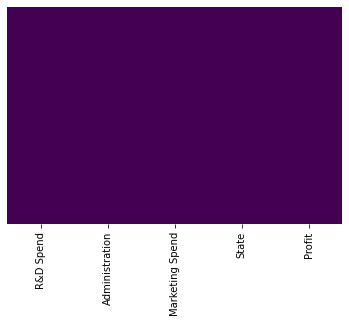

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

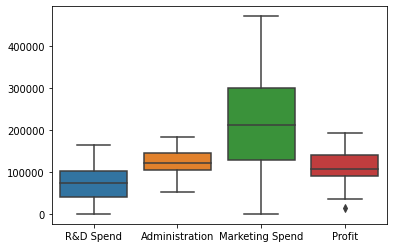

In [25]:
sns.boxplot(data=data)

In [29]:
#Finding Quartiles 1st and 3rd
q1 = data['Profit'].quantile(0.25)
q3 = data['Profit'].quantile(0.75)
median = data['Profit'].quantile(0.50)
qd = q3-q1

In [16]:
outlier  = []
down = q1 - 1.5*qd
profit = data['Profit']
for i in profit:
  if i<down:
    outlier.append(i)
print(outlier) 

[14681.4]


In [30]:
data['Profit'] = data['Profit'].replace(outlier,median)

<Axes: >

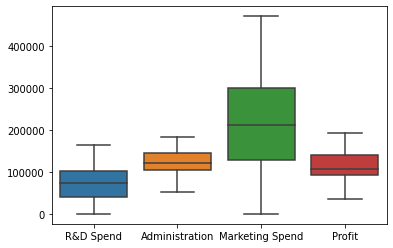

In [31]:
sns.boxplot(data=data)

In [32]:
X = data['R&D Spend'].values
y = data['Profit'].values
print(X.shape,y.shape)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape,y.shape)

(50,) (50,)
(50, 1) (50, 1)


In [33]:
#Spliting the data into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05,random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [35]:
y_predict = reg.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 7615.219622234876
MSE : 124072210.4767064
RMSE : 11138.770599877995
R2_SCORE : 0.9145790091818351


In [36]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 5408.470965239617
MSE : 29487321.720520824
RMSE : 5430.222989944412
R2_SCORE : 0.9394200426988922
